In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import pandas_profiling

C:\upx\python\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\upx\python\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\upx\python\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\upx\python\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\upx\python\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\upx\python\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\upx\python\Anac

In [2]:
#setting up local path
your_local_path = 'D:/Prashant/LEARNING/UPX/ML/Project/Loan Payment/'

# Data Wrangling

In [3]:
#Load data into data frame
df = pd.read_csv(your_local_path+'Loan payments data.csv')

In [4]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [5]:
#Create profile Report
report = pandas_profiling.ProfileReport(df)
report.to_file(your_local_path+'/profiling.html')

In [6]:
#Based on data profiling and requirement dropping unnecessary features
df.drop(columns=['effective_date','due_date','paid_off_time'],inplace=True)

In [7]:
#fill missing values
df['past_due_days'].fillna(value=0,inplace=True)
df.head()

,Loan_ID,loan_status,Principal,terms,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,0.0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,0.0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,0.0,28,college,female


In [8]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,500.000000,500.000000
mean,943.200000,22.824000,14.404000,31.116000
std,115.240274,8.000064,25.614312,6.084784
min,300.000000,7.000000,0.000000,18.000000
25%,1000.000000,15.000000,0.000000,27.000000
50%,1000.000000,30.000000,0.000000,30.000000
75%,1000.000000,30.000000,12.000000,35.000000
max,1000.000000,30.000000,76.000000,51.000000


In [9]:
df_1 = df.copy()

In [10]:
# dummy coding for changing the columns from categorical to numerical
for col in df_1.columns:
    if df_1[col].dtype =='object' and col != 'Loan_ID' :
        df_1[col]=pd.Categorical(df_1[col]).codes

In [11]:
merged_df = pd.merge(df,df_1,on='Loan_ID')

In [12]:
merged_df.head()

,Loan_ID,loan_status_x,Principal_x,terms_x,past_due_days_x,age_x,education_x,Gender_x,loan_status_y,Principal_y,terms_y,past_due_days_y,age_y,education_y,Gender_y
0,xqd20166231,PAIDOFF,1000,30,0.0,45,High School or Below,male,2,1000,30,0.0,45,1,1
1,xqd20168902,PAIDOFF,1000,30,0.0,50,Bechalor,female,2,1000,30,0.0,50,0,0
2,xqd20160003,PAIDOFF,1000,30,0.0,33,Bechalor,female,2,1000,30,0.0,33,0,0
3,xqd20160004,PAIDOFF,1000,15,0.0,27,college,male,2,1000,15,0.0,27,3,1
4,xqd20160005,PAIDOFF,1000,30,0.0,28,college,female,2,1000,30,0.0,28,3,0


In [13]:
df_1.head()

,Loan_ID,loan_status,Principal,terms,past_due_days,age,education,Gender
0,xqd20166231,2,1000,30,0.0,45,1,1
1,xqd20168902,2,1000,30,0.0,50,0,0
2,xqd20160003,2,1000,30,0.0,33,0,0
3,xqd20160004,2,1000,15,0.0,27,3,1
4,xqd20160005,2,1000,30,0.0,28,3,0


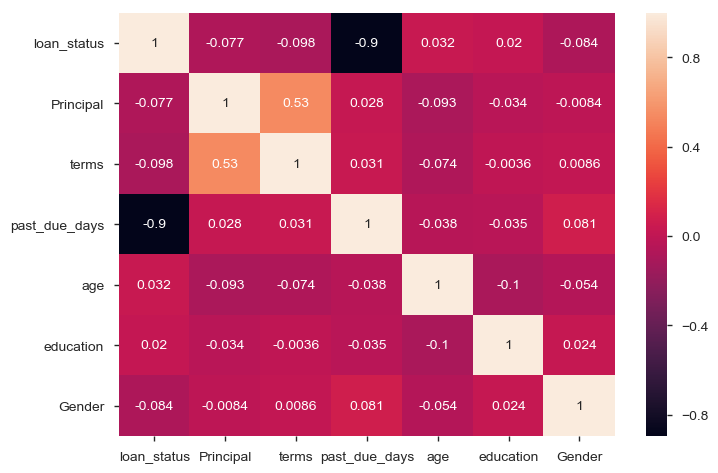

In [14]:
#correlation 
sns.heatmap(df_1.corr(),annot=True)

# Exploratory Data Analysis

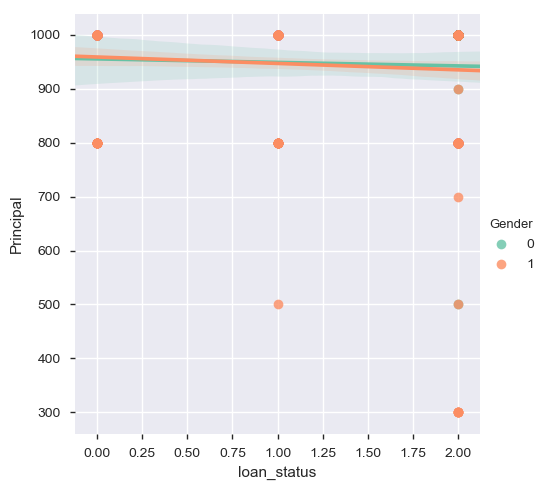

In [15]:
#Relationshhp between Loan_status, Gender and Principal
plt.figure(0,figsize=(5,3))
mx = sns.lmplot(x="loan_status", y="Principal",hue='Gender', data=df_1,palette='Set2')

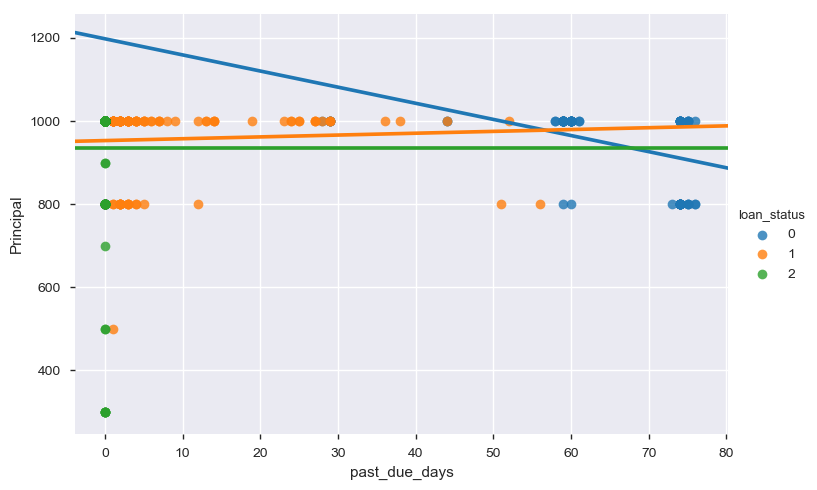

In [16]:
#Relationship between loan_status,Principal and Past due days 
plt.figure(0,figsize=(5,3))
sns.lmplot(x='past_due_days', y='Principal', hue = 'loan_status', data=df_1, aspect=1.5, ci = None, fit_reg = True)

# Logistic Regression Model

In [17]:
df_log = df_1.copy()

In [18]:
#segregating Features/IV and Target/Label/DV
df_log_target = df_log['loan_status']
df_log.drop(columns=['loan_status','Loan_ID'],inplace=True)

In [19]:
#splitting in to train and test data set
from sklearn.model_selection import train_test_split
x_train_log,x_test_log,y_train_log,y_test_log = train_test_split(df_log,df_log_target,test_size = 0.25,random_state = 1234)

In [20]:
#implemetion of Logistic regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train_log,y_train_log)

predictions_log = clf.predict(x_test_log)

In [21]:
# Use score method to get accuracy of model
score_log = clf.score(x_test_log, y_test_log)
print(score_log)

0.92


In [22]:
#confusion metrics
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(y_test_log, predictions_log)

In [23]:
cm_log

array([[26,  0,  0],
       [ 6, 11,  4],
       [ 0,  0, 78]], dtype=int64)

In [24]:
# Calculate precision and recall in logistic regression
from sklearn.metrics import classification_report
print (classification_report(y_test_log, predictions_log))

             precision    recall  f1-score   support

          0       0.81      1.00      0.90        26
          1       1.00      0.52      0.69        21
          2       0.95      1.00      0.97        78

avg / total       0.93      0.92      0.91       125



# Decision Tree Model

In [25]:
#segregating Features/IV and Target/Label/DV
df_dt = df_1.copy()
df_dt.drop(columns=['Loan_ID'],inplace=True)
target_dt = df_dt['loan_status']
df_dt.drop(columns=['loan_status'],inplace=True)

In [26]:
#splitting in to train and test data set
train_x_dt,test_x_dt,train_y_dt,test_y_dt = train_test_split(df_dt,target_dt,test_size = 0.25,random_state = 1234)

In [27]:
#implemetion of Decision Tree model
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion='entropy',max_depth = 4)
clf_tree.fit(train_x_dt,train_y_dt)

predict_tree = clf_tree.predict(test_x_dt)

In [28]:
# Use score method to get accuracy of model
tree_score = clf_tree.score(test_x_dt,test_y_dt)

In [29]:
#confusion metrics
from sklearn.metrics import confusion_matrix
cm_tree = confusion_matrix(test_y_dt, predict_tree)
print(cm_tree)

[[26  0  0]
 [ 3 18  0]
 [ 0  0 78]]


In [30]:
# Calculate precision and recall in Decision Tree Model
print (classification_report(test_y_dt, predict_tree))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95        26
          1       1.00      0.86      0.92        21
          2       1.00      1.00      1.00        78

avg / total       0.98      0.98      0.98       125



# Support Vector Machine

In [31]:
#segregating Features/IV and Target/Label/DV
df_svc = df_1.copy()
target_svc = df_svc['loan_status']
df_svc.drop(columns=['loan_status','Loan_ID'],inplace=True)

In [32]:
#splitting in to train and test data set
train_x_svc,test_x_svc,train_y_svc,test_y_svc = train_test_split(df_svc,target_svc,test_size = 0.25,random_state = 1234)

In [33]:
#implemetion of SVC model
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(train_x_svc,train_y_svc)

predict_svc = clf_svc.predict(test_x_svc)

In [34]:
# Use score method to get accuracy of model
score_svc = clf_svc.score(test_x_svc,test_y_svc)

In [35]:
#confusion metrics
from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(test_y_svc, predict_svc)
print(cm_svc)

[[17  1  8]
 [ 0 13  8]
 [ 0  0 78]]


In [36]:
# Calculate precision and recall in Decision Tree Model
print (classification_report(test_y_svc, predict_svc))

             precision    recall  f1-score   support

          0       1.00      0.65      0.79        26
          1       0.93      0.62      0.74        21
          2       0.83      1.00      0.91        78

avg / total       0.88      0.86      0.86       125



# Evaluating Different Models

[]

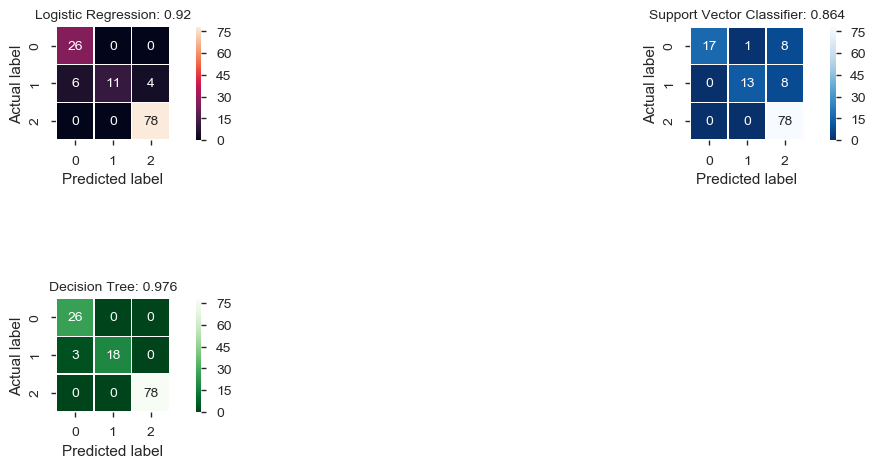

In [37]:
plt.figure(0,figsize=(15,15)).set_figheight(5)

plt.subplot(321)
sns.heatmap(cm_log, annot=True, fmt="d", linewidths=.2, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Logistic Regression: {0}'.format(score_log)
plt.title(title, size = 10);

plt.subplot(322)
sns.heatmap(cm_svc, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Support Vector Classifier: {0}'.format(score_svc)
plt.title(title, size = 10);

plt.subplot(325) 
sns.heatmap(cm_tree, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree: {0}'.format(tree_score)
plt.title(title, size = 10);

#fig.tight_layout()
plt.plot()

# Conclusion